## Observations and Insights 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [135]:
# Checking the number of mice.
merge_data_df["Mouse ID"].value_counts().count()


249

In [136]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = merge_data_df.loc[merge_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [94]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID. (remove with isin())
remove_duplicates_df = merge_data_df[~merge_data_df.isin(duplicate_mouse_ids)].dropna()

#remove_duplicates_df.count()
#remove_duplicates_df["Mouse ID"].value_counts().count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [137]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicates = pd.concat(g for _, g in merge_data_df.groupby(['Mouse ID','Timepoint']) if len(g) > 1)
all_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [138]:
# Checking the number of mice in the clean DataFrame.
remove_duplicates_df["Mouse ID"].value_counts().count()

#remove_duplicates_df["Mouse ID"].count()

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

group_by_regimen = remove_duplicates_df.groupby(["Drug Regimen"])

mean_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].mean()

median_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].median()

var_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].var()

std_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].std()

sem_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df = pd.DataFrame({"Mean": mean_tv_by_regimen, 
                                      "Median": median_tv_by_regimen,
                                      "Variance": var_tv_by_regimen,
                                      "STD": std_tv_by_regimen,
                                     "SEM": sem_tv_by_regimen})

# Data formatting
summary_statistics_df.style.format({"Mean": "{:.2f}",
                                    "Median": "{:.2f}",
                                    "Variance": "{:.2f}",
                                   "STD": "{:.2f}",
                                   "SEM": "{:.2f}"})


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = group_by_regimen["Tumor Volume (mm3)"].agg(Mean="mean", Median="median",Variance="var",STD="std", SEM="sem")

# Data formatting
summary_statistics_agg.style.format({"Mean": "{:.2f}",
                                    "Median": "{:.2f}",
                                    "Variance": "{:.2f}",
                                   "STD": "{:.2f}",
                                   "SEM": "{:.2f}"})

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

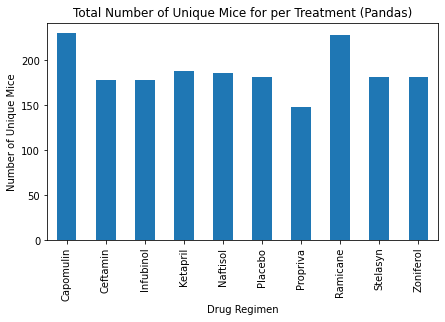

<Figure size 432x288 with 0 Axes>

In [160]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas pandas

num_mice_pandas = group_by_regimen["Timepoint"].count().plot(kind="bar", figsize=(7,4), title="Total Number of Unique Mice for per Treatment (Pandas)")

num_mice_pandas.set_xlabel("Drug Regimen")
num_mice_pandas.set_ylabel("Number of Unique Mice")

plt.show()
plt.tight_layout()

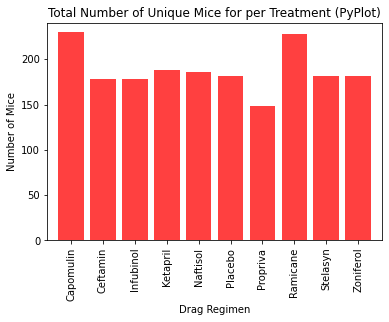

In [161]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = summary_statistics_agg.index
y_axis = group_by_regimen["Timepoint"].count()

plt.title("Total Number of Unique Mice for per Treatment (PyPlot)")
plt.xlabel("Drag Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 10)

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.xticks(x_axis, rotation="vertical")
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


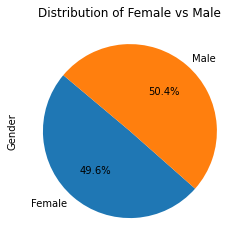

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_by_sex = remove_duplicates_df.groupby(["Sex"])

# Counting Players by Gender
gender_count = group_by_sex.nunique()["Mouse ID"]
print(gender_count)

gender_pie = gender_count.plot(kind="pie",  figsize=(7,4), autopct="%1.1f%%", startangle=140, title = "Distribution of Female vs Male")
gender_pie.set_ylabel("Gender")

plt.show()



([<matplotlib.patches.Wedge at 0x298b134e080>,
 [Text(-0.7176837777416648, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

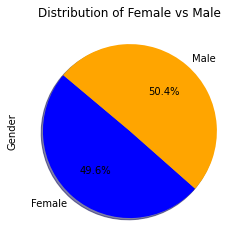

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
plt.title("Distribution of Female vs Male")
plt.ylabel("Gender")

plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_by = remove_duplicates_df.groupby(["Mouse ID"])
max_timepoint = group_by["Timepoint"].max()

#Conver max_timepoint to DataFrame
df_max_timepoint = pd.DataFrame({"Timepoint": max_timepoint})
#df_max_timepoint
#print(max_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_timepoint = pd.merge(max_timepoint,remove_duplicates_df, on=["Mouse ID", "Timepoint"])
merge_max_timepoint.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

selected_drugs_df = pd.DataFrame() #DataFrame of the tumor volume of each mouse across four of the treatment regimens
outliers_df = pd.DataFrame() #DataFrame of Outliers per Drug

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol = []
    for x in range(len(merge_max_timepoint)):
        #print(x)
        if merge_max_timepoint.iloc[x,4] == drug:
            tumor_vol.append(merge_max_timepoint.iloc[x,2])
        else:
            pass
             
    # add subset: DataFrame of the tumor volume of each mouse across four of the treatment regimens   
    selected_drugs_df[drug] = tumor_vol
        
    # Determine outliers using upper and lower bounds
    quartiles = selected_drugs_df[drug].quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    
    new_row = ({"Treatment": drug, "Lower Outlier" : lower_bound, "Upper Outlier": upper_bound})
    outliers_df = outliers_df.append(new_row, ignore_index=True)
   
outliers_df = outliers_df[["Treatment", "Lower Outlier", "Upper Outlier"]]


# Data formatting
outliers_df.style.format({"Lower Outlier": "{:.2f}",
                                    "Upper Outlier": "{:.2f}"})


,Treatment,Lower Outlier,Upper Outlier
0,Capomulin,20.70,51.83
1,Ramicane,17.91,54.31
2,Infubinol,36.83,82.74
3,Ceftamin,25.36,87.67


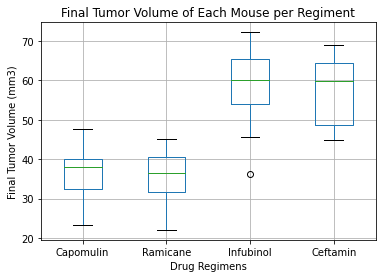

In [167]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot = selected_drugs_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volume of Each Mouse per Regiment")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

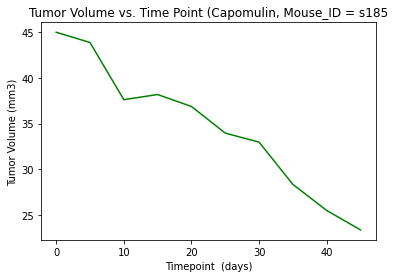

In [148]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a new DataFrame that looks into Capomulin only
only_Capomulin = remove_duplicates_df.loc[(remove_duplicates_df["Drug Regimen"] == "Capomulin"), ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
only_Capomulin.head()

# Select data of a single mouse. I choose Mouse_ID = i738
selected_mouse_id = only_Capomulin.loc[only_Capomulin["Mouse ID"] == "s185"]
selected_mouse_id

#line plot for selected mouse (tumor volume vs. time point)
x_axis = selected_mouse_id["Timepoint"]
y_axis = selected_mouse_id["Tumor Volume (mm3)"]

plt.title("Tumor Volume vs. Time Point (Capomulin, Mouse_ID = s185")
plt.xlabel("Timepoint  (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis, y_axis, color="green")
plt.show()



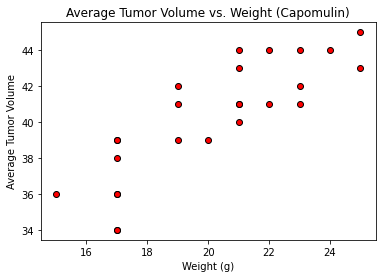

In [149]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

group_by_weight = only_Capomulin.groupby(["Mouse ID"])

tumor_avr_mouseID = group_by_weight["Tumor Volume (mm3)"].mean().astype(int)

weight_mouseID = group_by_weight["Weight (g)"].unique().astype(int)

#Set a DataFrame with obtained results
tumor_avr_df = pd.DataFrame({"Weight": weight_mouseID, "Average Tumor Volume": tumor_avr_mouseID})

#Plotting
x_axis = tumor_avr_df["Weight"]
y_axis = tumor_avr_df["Average Tumor Volume"]

plt.title("Average Tumor Volume vs. Weight (Capomulin)")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight (g)")


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.show()

## Correlation and Regression

The correlation between average tumor volume and mouse weight is nan


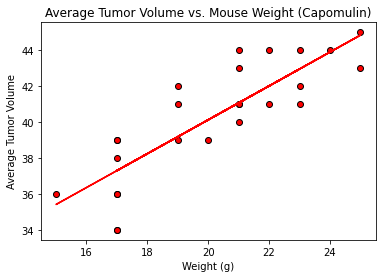

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#print(tumor_avr_df)

#Correlation Coeff.

from scipy.stats import linregress

x_axis = tumor_avr_df["Weight"]
y_axis = tumor_avr_df["Average Tumor Volume"]

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between average tumor volume and mouse weight is {round(correlation[0],2)}")

#Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(8,16),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight (g)")

plt.show()

